
# 2.2-kW PMSM

This example simulates sensorless flux-vector control of a 2.2-kW PMSM drive.


In [1]:
pip install motulator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 2.2 MB/s eta 0:00:00


In [2]:
from motulator.drive import model
import motulator.drive.control.sm as control
from motulator.drive.utils import (
    BaseValues, NominalValues, plot, SynchronousMachinePars)

Compute base values based on the nominal values (just for figures).



In [3]:
nom = NominalValues(U=370, I=4.3, f=75, P=2.2e3, tau=14)
base = BaseValues.from_nominal(nom, n_p=2)

Configure the system model.



In [4]:
mdl_par = SynchronousMachinePars(
    n_p=3, R_s=3.6, L_d=.036, L_q=.051, psi_f=.545)
machine = model.SynchronousMachine(mdl_par)
mechanics = model.StiffMechanicalSystem(J=.015)
converter = model.VoltageSourceConverter(u_dc=540)
mdl = model.Drive(converter, machine, mechanics)

Configure the control system.



In [5]:
par = mdl_par  # Assume accurate machine model parameter estimates
cfg = control.FluxTorqueReferenceCfg(par, max_i_s=1.5*base.i, k_u=.9)
ctrl = control.FluxVectorControl(par, cfg, J=.015, T_s=250e-6, sensorless=True)

Set the speed reference and the external load torque.



In [6]:
# Speed reference (electrical rad/s)
ctrl.ref.w_m = lambda t: (t > .2)*2*base.w

# Load torque step
mdl.mechanics.tau_L = lambda t: (t > .8)*nom.tau*.7

Create the simulation object and simulate it.



In [7]:
sim = model.Simulation(mdl, ctrl)
sim.simulate(t_stop=1.6)

Plot results in per-unit values.



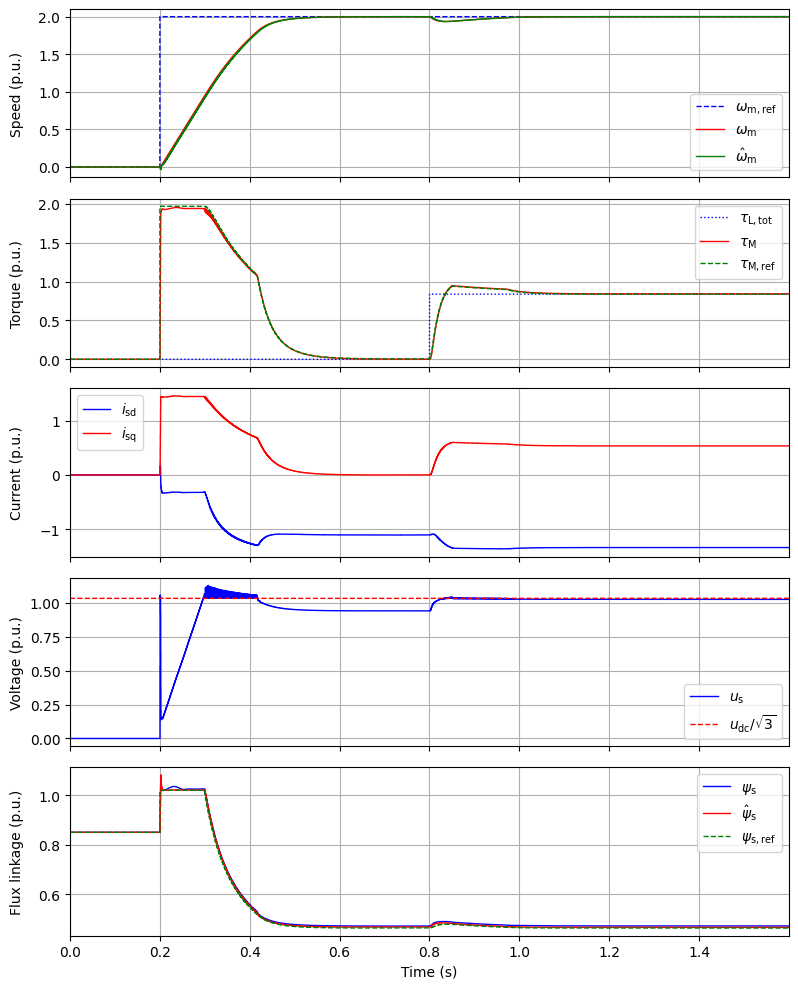

In [8]:
plot(sim, base)